#Fashion-MNIST: Optimal Neural Network for Image Classification

Task of creating a custom feed-forward deep neural network. Our mission: to classify images from the Fashion-MNIST dataset with precision, employing tuning techniques to boost accuracy.Used a feed-forward deep neural network, a type of network that excels in image classification. To keep things simple and efficient, applied the RELU activation function and the Adam optimizer.

#Import Libraries

In [ ]:
# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
import keras


# Additional imports
import matplotlib.pyplot as plt
import kerastuner as kt


#Load Data

In [ ]:
# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

#Data Shape

In [ ]:
# Make sure that the data is in the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


#Normalization

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [ ]:
# One hot encode the output data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Model Development

In [ ]:
# Create the model
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


##Optimization

In [ ]:
# Define the learning rate
custom_learning_rate = 0.001  # Adjust this value as needed

# Create the optimizer with the custom learning rate
opt = keras.optimizers.Adam(learning_rate=custom_learning_rate)


##Compilation

In [ ]:
# Compile the model with the custom optimizer
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


##Summary

In [ ]:
# Display the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6438 - accuracy: 0.7832 - val_loss: 0.5253 - val_accuracy: 0.8190
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4740 - accuracy: 0.8377 - val_loss: 0.4785 - val_accuracy: 0.8356
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4469 - accuracy: 0.8443 - val_loss: 0.4656 - val_accuracy: 0.8401
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4329 - accuracy: 0.8510 - val_loss: 0.4746 - val_accuracy: 0.8313
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4233 - accuracy: 0.8536 - val_loss: 0.4495 - val_accuracy: 0.8449
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8553 - val_loss: 0.4537 - val_accuracy: 0.8441
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4083 - accuracy: 0.8587 - val_loss: 0.4514 - val_accuracy:

##Model history plot

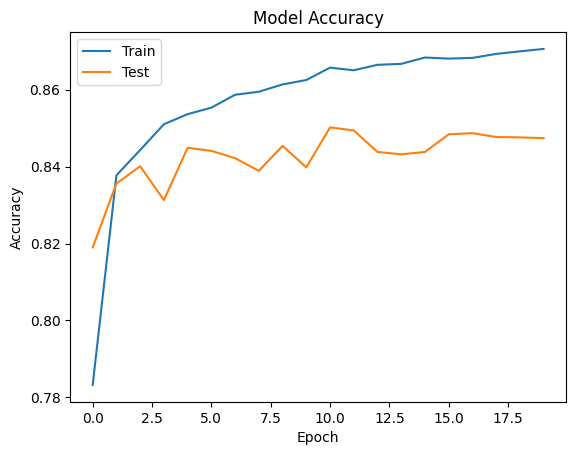

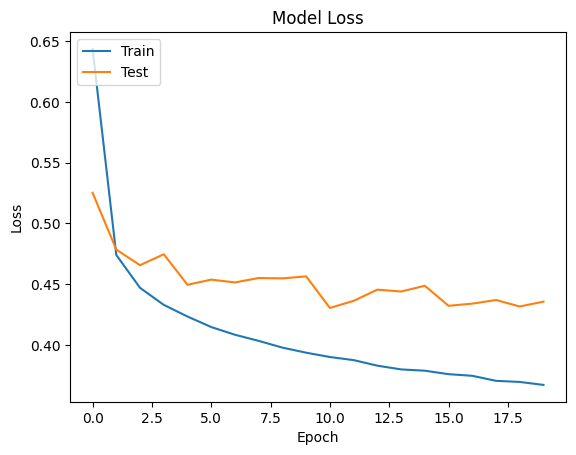

In [ ]:
# Summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#Data Augmentation

Applying various transformations like rotation, shifts, shear, zoom, and horizontal flipping to augment the training dataset.

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

##Reshaping and model execution

In [ ]:
# Reshape input data for training and validation
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Fit the model with augmented data
history = model.fit(datagen.flow(x_train_reshaped, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32, epochs=20, validation_data=(x_test_reshaped, y_test))

datagen.fit(x_train.reshape(-1, 28, 28, 1))

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 1.8340 - accuracy: 0.3530 - val_loss: 1.0163 - val_accuracy: 0.6328
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 1.4611 - accuracy: 0.4518 - val_loss: 1.0201 - val_accuracy: 0.6116
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 1.3292 - accuracy: 0.5072 - val_loss: 0.9472 - val_accuracy: 0.6667
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 1.2172 - accuracy: 0.5482 - val_loss: 0.8853 - val_accuracy: 0.6912
Epoch 5/20
1875/1875 [==============================] - 25s 14ms/step - loss: 1.1685 - accuracy: 0.5673 - val_loss: 0.8688 - val_accuracy: 0.6890
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1361 - accuracy: 0.5818 - val_loss: 0.8611 - val_accuracy: 0.6872
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1160 - accuracy: 0.5884 - val_loss: 0.8579 -

##Model history plot

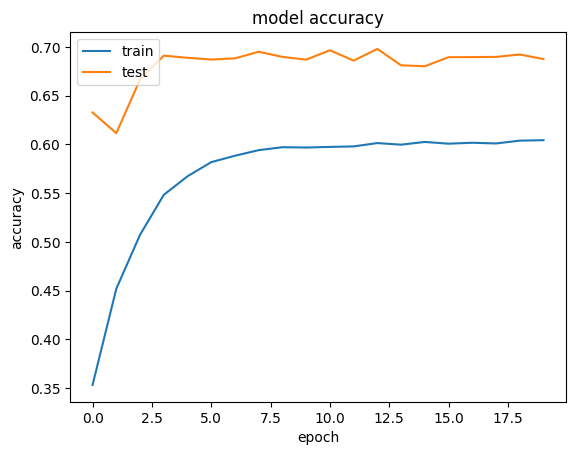

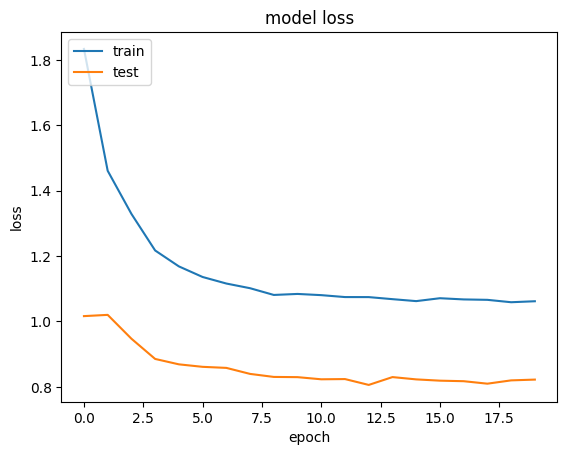

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Hyperparameter Tuning

Defines a Keras neural network with hyperparameter tuning using the Keras Tuner. Sequential model, flattened input, dense hidden layer (ReLU activation), softmax output. Optimizes learning rate with Adam optimizer for categorical crossentropy loss and accuracy metrics.

In [ ]:
# Define the neural network model
def model_builder2(hp):  # Accept hyperparameters as arguments
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    # Define the hyperparameter for learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Create the Adam optimizer with the variable learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    # Set the optimizer in the compile method
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner and perform hyper-tuning
tuner = kt.Hyperband(model_builder2,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
# Define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
import IPython
# run the hyperparameter search
tuner.search(x_train, y_train, epochs = 20, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 3 Complete [00h 00m 22s]
val_accuracy: 0.8644000291824341

Best val_accuracy So Far: 0.8644000291824341
Total elapsed time: 00h 03m 32s


In [ ]:
# Print out the hyperparameters keras tuner has determined to be the best values
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'learning_rate': 0.001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [ ]:
# Set the model to have the optimum hyperparameters and print the summary
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the model as usual
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5023 - accuracy: 0.8231 - val_loss: 0.4164 - val_accuracy: 0.8531
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3750 - accuracy: 0.8641 - val_loss: 0.3979 - val_accuracy: 0.8527
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8762 - val_loss: 0.3732 - val_accuracy: 0.8610
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3126 - accuracy: 0.8857 - val_loss: 0.3673 - val_accuracy: 0.8712
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8900 - val_loss: 0.3413 - val_accuracy: 0.8773
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2810 - accuracy: 0.8957 - val_loss: 0.3433 - val_accuracy: 0.8800
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2691 - accuracy: 0.9005 - val_loss: 0.3566 - val_accuracy

##Model history plot

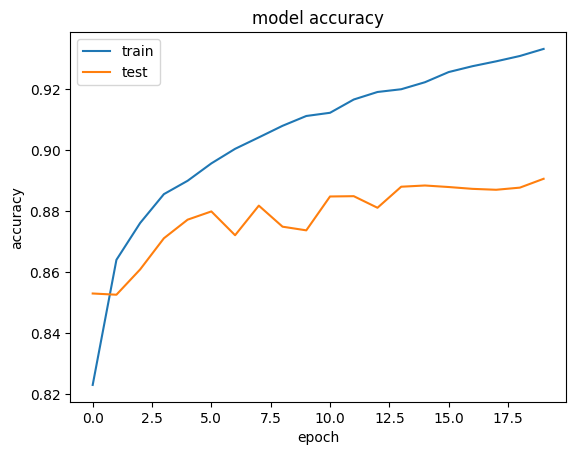

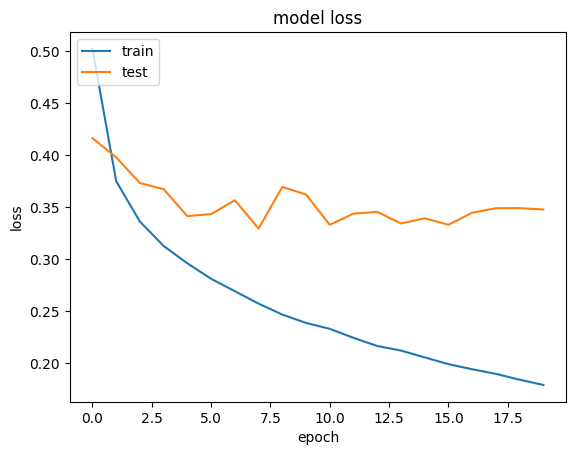

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()